# Автовыделение интервалов коллектора по данным ГИС
В данном упражнении предлагается использовать знания, полученные во время обучения, для решения задачи автоматической интерпретации каротажных кривых.

## Описание кейса

На основе седиментологического описания одного из обнажений Шестаковского полигона, расположенного в Томской области, была построена синтетическая 3D геологическая модель.
<img src="img\Razrez.png">
При ее создании для повышения степени геологического реализма полученного результата в используемую структурную поверхность был внесен разлом, который разделяет модель в пропорции 1 к 4. Таким образом, с западной стороны от разлома структурная сетка содержит 324 ячейки, а с восточной - 1056. В каждой ячейке была создана синтетическая скважина и каротажные кривые, которые рассчитывались на основе априорных знаний о физических характеристиках тех или иных литологий и ячеек, которые пересекала скважина.

В представленном Jupyter-ноутбуке предложен подход к предсказанию литологии по размеченным данным керна и каротажным кривым для одного нефтегазового месторождения. Разметка литологии сделана по данным керна и используется для обучения модели машинного обучения для предсказания литологии по каротажам в скважинах в которых не был произведен отбор керна. Этот алгоритм может быть применен к другим резервуарам нефти и газа для улучшения предсказания литологии.

# Цель работы

Основная цель работы заключается в том, чтобы используя информацию по восточной части месторождения (1056 скважин) построить модель, которая сможет прогнозировать наличие или отсутствие коллектора в интервале в зависимости от показаний каротажных кривых. Далее, используя полученную модель, необходимо предсказать наличие или отсутствие коллектора для скважин, находящихся западнее от разлома (324).
<img src="img\NTG.png">

Извлечение керна является дорогостоящим процессом, что влечет за собой то, что лишь в небольшом количестве скважин и интервалов отбирается керн. В отличие от отбора керна, проведение геофизических исследований в скважинах относительно недорого и является стандартной операцией. Взаимосвязи между литологией и каротажными кривыми часто является сложными и нелинейными. В последнее время многие научные исследования показали, что алгоритмы машинного обучения могут улучшить предсказание литологии. Основными преимуществами применения методов машинного обучения к такой задаче являются повышение точности предсказания и снижение временных затрат на интерпретацию литологии, что особенно важно при принятии решений на ранней стадии изучения резервуара.

В качестве базового решения для этого хакатона мы предлагаем алгоритм классификации на основе метода ближайших соседей. Цель обучения с учителем состоит в том, чтобы разметить лишь небольшую часть набора данных и применить построенную модель для предсказания оставшейся части датасета. Такой data-driven подход позволяет оптимизировать комплекс каротажных исследований и программу отбора керна.

Участникам доступен набор данных (`Shestakovo_validation.csv`), содержащий каротажные кривые 11 скважин месторождения:

#### Gamma ray log (`GR`) Гамма каротаж

Гамма каротаж измеряют естественную радиоактивность горных пород и в основном используется для определения глинистости пласта. Значения гамма каротажа будут низкими в пластах без глинистых горных пород, таких как песчаники (состоящие из нерадиоактивного кварца), известняки, доломиты, ангидриты, большая часть солей и углей, и высокими в глинах из-за высоких концентраций радиоактивных материалов. Чистые песчаники (с низким содержанием глинистых минералов) могут также иметь высокие значения гамма каротажа, если песчаник содержит калиевые полевые шпаты, слюды, органические материалы (с абсорбированным ураном), богатые ураном пластовые воды или радиоактивные минералы. Известняки и доломиты также могут содержать радиоактивный органические материал или богатые ураном воды и как следствие иметь высокую радиоактивность. Некоторые угли могут быть радиоактивными из-за присутствия радиоактивных элементов, таких как уран, торий, калий-40, радий и полоний.

#### Density log (`DENS`) Плотностной каротаж

Плотностной каротаж связан с объемной плотностью пласта. Принцип работы прибора основан на радиоактивном источнике и счетчике. Когда прибор находится в стволе скважины, он испускает радиоактивные частицы, которые взаимодействуют с электронами в пласте посредством комптоновского рассеяния, полученное гамма излучение подсчитывается для определения объемной плотности горной породы. Объемная плотность представляет собой общую плотность матрицы и флюидов (воды, нефти, газа) в порах. Следовательно, традиционным использованием плотностного каротажа  является определение пористости горных пород. В пласте с низкой пористостью измеренные значения плотности будут ближе к минералогической (матричной) плотности, а с увеличением значений пористости - ниже. Пористость рассчитанная по плотностному каротажу обычно считается лучше, чем рассчитанная CN и акустическому каротажу в терригенных породах, потому что на нее меньше влияет глинистость, так как кварц, полевой шпат и сухие глинистые минералы имеют схожие плотности. Кривая плотности используется для литологической дифференциации горных пород (часто используется в комбинации с CN).


Проверка предсказания участников будет выполнена на скрытом датасете (`Validation-dataset.csv`) с распределением классов литологии, аналогичным обучающему набору. Качество предсказания будет оцениваться по взвешенному на количество меток каждого класса литологии F1-score.

Задача участников хакатона состоит в том, чтобы сделать лучшее предсказание литологии, которое вы можете получить

In [1]:
# Загружаем необходимые библиотеки
import pandas as pd
import numpy as np
import random as rd
import seaborn as sns
from tqdm import tqdm
import lasio
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score
%matplotlib inline

In [5]:
# Загружаем данные тренировочной части
# Initialize an empty DataFrame
train_data = pd.DataFrame()

# Initialize an empty list to store individual DataFrames
dfs = []

# Loop through each file in the directory
for file in tqdm(os.listdir("data/train_test")):
    try:
        # Read the LAS file and convert it to a DataFrame
        las_file = lasio.read(os.path.join("data/train_test", file)).df().reset_index()

        # Add the well name
        las_file["Well"] = file[:-4]

        # Append the DataFrame to the list
        dfs.append(las_file)
    except Exception as e:
        print(f"An error occurred while processing {file}: {e}")

# Concatenate all DataFrames
train_data = pd.concat(dfs, ignore_index=True)

# Rename columns
train_data.columns = ["DEPT", "SP", "GR", "DT", "DENS", "LITHO", "Well"]

100%|██████████| 990/990 [00:04<00:00, 207.60it/s]


## Описание данных
Файл с тренировочными данными содержит информацию по 1056 скважинам, находящимся восточнее разлома. Каждая скважина представлена 4 каротажными кривыми:

- **SP** (каротаж естественной поляризации)
- **GR** (гамма каротаж)
- **DT** (акустический каротаж)
- **Density** (плотностной каротаж)

В качестве кривой РИГИС выступает дискретный каротаж **LITHO**, который при значении "1" говорит о наличие коллектора, а при значении "0" о его отсутствии.

##### Статистическая оценка

В этом блоке мы поближе изучим данные со статистической точки зрения.

In [6]:
# Посмотрим, какие типы данных представлены в загруженном файле и есть ли в нем пропуски
train_data.info()
train_data["LITHO"] = train_data["LITHO"].astype(int)
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203099 entries, 0 to 203098
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   DEPT    203099 non-null  float64
 1   SP      203099 non-null  float64
 2   GR      203099 non-null  float64
 3   DT      203099 non-null  float64
 4   DENS    203099 non-null  float64
 5   LITHO   203099 non-null  float64
 6   Well    203099 non-null  object 
dtypes: float64(6), object(1)
memory usage: 10.8+ MB


,DEPT,SP,GR,DT,DENS,LITHO,Well
0,2503.9,-42.030933,114.830032,297.706055,2.359989,0,230-919
1,2504.0,-43.107811,114.883263,298.080078,2.358807,0,230-919
2,2504.1,-44.213234,114.892136,298.406311,2.357389,0,230-919
3,2504.2,-45.381577,114.800934,298.623596,2.355443,0,230-919
4,2504.3,-46.138340,114.704262,298.765534,2.353891,0,230-919


In [7]:
# Посмотрим статистику по данным
train_data.describe()

,DEPT,SP,GR,DT,DENS,LITHO
count,203099.000000,203099.000000,203099.000000,203099.000000,203099.000000,203099.000000
mean,2514.029415,-77.407355,90.875375,307.165724,2.342216,0.323414
std,9.306925,27.588862,19.810404,11.667743,0.022138,0.467780
min,2485.100000,-125.710487,57.799000,283.392731,2.295403,0.000000
25%,2507.800000,-102.279652,71.676132,297.902679,2.324109,0.000000
50%,2514.900000,-72.802902,93.382996,303.161560,2.349329,0.000000
75%,2521.000000,-52.256079,111.070805,316.708115,2.359741,1.000000
max,2543.700000,-38.943268,116.989639,330.196503,2.390461,1.000000


##### Визуальная оценка

Ниже будет проведена визуальная оценка данных с целью найти какие-либо зависимости в данных для лучшего их понимания.

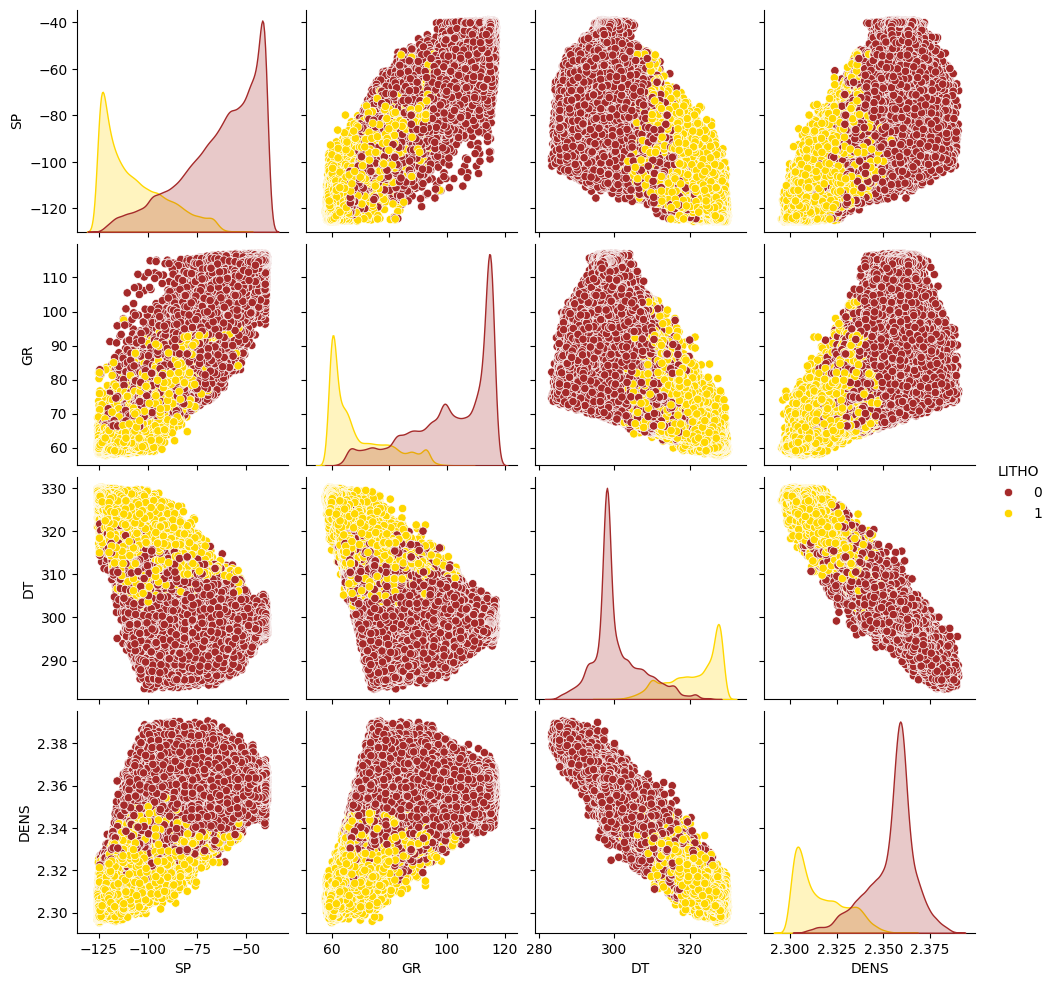

In [8]:
# Проведем визуальную оценку имеющийся информации
target_logs = [
    log for log in train_data.columns if log not in ["LITHO", "Well", "DEPT"]
]
sns.pairplot(train_data, vars=target_logs, hue="LITHO", palette=["brown", "gold"])

## Подготовка данных и построение базовой модели

В представленном задании перед слушателем стоит 2 цели - индивидуальная и участие в соревновании среди слушателей.

Индивидуальной целью является победа над имеющейся простейшей моделью на тестовом наборе данных.

Соревновательная цель заключается в участии в соревновании среди всех слушателей, во время которого от Вас требуется показать наилучший результат предсказания распределения интервалов коллектора на скрытом наборе данных (скважины находящиеся западнее разлома).

В блоках ниже расположен код, отвечающий за разбитие данных на тренировочную и тестовую части, а также построение базовой модели с последующей оценкой ее качества.

In [9]:
# Разобьем данные на тренировочную и тестовую части в пропорции 0.7 и 0.3 соответственно
train_part_size = 0.7

# Случайно выберем скважины для тренировочного и тестового наборов
rd.seed(17)
train_wells = rd.sample(
    train_data.Well.unique().tolist(),
    round(len(train_data.Well.unique()) * train_part_size),
)
train_set = train_data.loc[train_data.Well.isin(train_wells)]
test_set = train_data.loc[
    train_data.Well.isin(i for i in train_data.Well.unique() if i not in train_wells)
]

In [10]:
# Разобьем данные тренировочной и тестовой частей на матрицу признаков и вектор классов

Feature_train = train_set.drop(["DEPT", "Well", "LITHO"], axis=1)
Target_train = train_set["LITHO"]

Feature_test = test_set.drop(["DEPT", "Well", "LITHO"], axis=1)
Target_test = test_set["LITHO"]

In [11]:
# Здесь мы для предсказания будем использовать одну из самых простых моделей - Метод ближайшего соседа
# Полученная точность будет взята за планку, которую необходимо побить
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(Feature_train, Target_train)
predicted_litho = clf.predict(Feature_test)

In [12]:
# Посчитаем точность полученную нашей baseline-моделью
# Считаться будут две метрики - F1 и Accuracy
base_acc = accuracy_score(Target_test, predicted_litho)
base_f1 = f1_score(Target_test, predicted_litho)
print(
    "F1 метрика равна %.3f, и доля правильных ответов составляет %.3f для базового кейса."
    % (base_f1, base_acc)
)

F1 метрика равна 0.861, и доля правильных ответов составляет 0.908 для базового кейса.


## Построение модели

Загрузив все необходимые данные, проведя их их предварительную обработку и получив первые предсказания, можно перейти непосредственно к построению собственной модели.
В ячейке ниже создайте свою модель, которая будет называться **user_clf**, предварительно импортировав необходимые библиотеки.
После чего получите с ее помощью предсказание для тестовой части набора **Feature_test**, назвав переменную, хранящую предсказание, именем **user_prediction**.

Вам необходимо выбрать такую модель, которая показала бы более высокую точность предсказания, чем модель в ячейках выше.

In [13]:
# Ваш код здесь
n_neighbors = 2
user_clf = KNeighborsClassifier(n_neighbors=n_neighbors)
user_clf.fit(Feature_train, Target_train)
user_prediction = clf.predict(Feature_test)

In [14]:
# Посчитаем точность полученную моделью слушателя
# Считаться будут две метрики - F1 и Accuracy
user_acc = accuracy_score(Target_test, user_prediction)
user_f1 = f1_score(Target_test, user_prediction)
print(
    "F1 метрика равна %.3f, и доля правильных ответов составляет %.3f для модели слушателя курса."
    % (user_f1, user_acc)
)

F1 метрика равна 0.861, и доля правильных ответов составляет 0.908 для модели слушателя курса.


# Предсказание по скрытым скважинам

На данный момент вы уже имеете наилучшую на ваш взгляд модель. Теперь ее можно использовать для предсказания распределения интервалов коллектора на скрытой части данных. В дальнейшем предсказание каждого слушателя будет проверено по имеющимся реальным меткам коллектора и оценено соответствующими метриками. 
Все участники узнают точность своего предсказания только в конце соревнования, когда будет получен сводный итог.

In [15]:
# В переменную user_name введите свою фамилию и инициалы, как в примере ниже
user_name = "Фамилия-Имя-Отчество"

In [17]:
# Загружаем данные каротажей по скрытым скважинам и предобрабатываем их
validation_data = pd.read_csv("data/Shestakovo_validation.csv")
Feature_valid = validation_data.drop(["Well", "DEPT"], axis=1)
valid_predict = pd.Series(
    user_clf.predict(Feature_valid), name="%s_prediction" % user_name
)
valid_predict.to_csv("%s_prediction.csv" % user_name, index=None)